<font size="6">When Learning Wins in the Attention Economy</font>


In the era of the "attention economy", many actors vie for our limited attention resources.  Some of the more admirable actors vying for our attention are MOOC (Massive Open Online Course) providers, offering pathways to social mobility, personal development, and lifelong learning. 

Much research has been done to analyze the factors that predict persistence and completion in online courses (Jordan, 2015), but little attention has been paid to the factors that elicit enough initial interest to garner student attention and enrollment in the first place. In order to realize online learning's potential to facilitate the above positive impacts, we must explore the types of courses that are eliciting the greatest interest and enrollment. After all, people are generally free to choose whether to enroll in an online course; more enticing courses yield a greater likelihood of learning opportunities winning the bidding war for our attention.

<font size="4">Data of Interest</font>

I analyzed data regarding 975 courses offered on the EdX online learning platform as of 2020. The dataset was pulled from Kaggle.com and was originally uploaded by Muhammad Nakhaee. The dataset is used under a GPL 2 license.

The raw dataset is linked here: <link> https://www.kaggle.com/datasets/imuhammad/edx-courses/code </link>

<font size="4">Variables of Interest</font>

**Title**: (title) The title of the course on the EdX site, as it is presented to prospective students.

**Summary**: (summary) A descriptive summary of what students will do and learn in the course, visible to prospective students.

**Number of Students Enrolled**: (n_enrolled) The number of students enrolled in the online course.

**Structure of Course Delivery**: (course_type) Whether the course is self-paced or led by an instructor on a fixed schedule.

**Institution Offering the Course**: (institution) The institution/university offering the online course.

**Instructor(s)**: (instructors) The instructor(s) offering the online course.

**Course Level**: (Level) The assumed prior knowledge level of students in a course, classified as Introductory, Intermediate, or Advanced.

**Course Subject**: (subject) The subject of the course, i.e. Computer Science or History.

**Language**: (language) The language in which the course if offered.

**Subtitles**: (subtitles) The language(s) in which subtitles are offered.

**Course Effort per Week**: (course_effort) The range of number of hours students spend per week on the course.

**Course Length**: (course_length) The number of weeks that the course takes (or is recommended to take, for self-paced courses).

**Price**: (price) The price of a verified certificate upon completion of the course (all courses can be taken for free without a verified certificate).

**Course Description**: (course_description) An overview of what students should expect to learn in the course, sometimes referencing why the course is valuable.

**Course Syllabus**: (course_syllabus) A schedule detailing what will happen throughout the course.

**Course URL**: (course_url) The URL at which the course can be accessed.



**Hypotheses:**

**Hypothesis (Ha) 1**: There is a negative association between course length and the number of people enrolled. Time is a limited resource, so learners in EdX MOOCs will be more likely to enroll in a course that demands less time.
**Null Hypothesis (Ho) 1**: There is no association between course length and the number of people enrolled.

**Hypothesis 2 (Ha)**: Students are more likely to enroll in courses offered by the top 10 universities in the world,
as ranked by U.S. New & World Report, than they are in courses offered by other institutions. The reputation of these top 10 schools could lead students to place more value on their courses.
**Null Hypothesis (Ho) 2**: There is no relationship between whether a given university is in the top 10 and whether a student enrolls in a course offered by that institution.

**Hypothesis (Ha) 3**: There is a negative association between course effort and the number of people enrolled.
Time is a limited resource, so learners in EdX MOOCs will likely prefer courses that demand fewer hours per week of labor.
**Null Hypothesis (Ho) 3**: There is no association between course effort (as measured in hours of labor per week)and the number of people enrolled.

**Hypothesis (Ha) 4**: There is a positive association between a course being related to computer science or data analytics/science and the number of people enrolled in an online course. As computer science and data-related jobs are growing rapidly, and people taking MOOCs have a demonstrated interest in spending time on a computer, it is reasonable to suspect that computer science and data analytics/science courses appeal to MOOC students.
**Null Hypothesis (Ho) 4**: There is no association between wether a course is related to computer science or data analytics/science and the number of people enrolled in an online course.

I will set the alpha level at .05 while exploring each of the above hypotheses.

**Based on the results of exploration of these hypotheses, additional hypotheses are made and explored after Ha 4.**



**Data Plan Organization**

Data Cleansing:
+ Data Auditing
+ Workflow Specification
+ Workflow Execution and Post-Processing Control

Statistical Methods:
+ Linear Regression Models
+ Stepwise Model Selection
+ Comparison of AIC, BIC, & Mallow's CP
+ Cross Validation
+ Comparison of MSE

**Data Cleansing:**
1. Datasheet downloaded from Kaggle.

2. Only data relevant to my hypotheses are kept:
+ n_enrolled
+ course_length
+ course_effort
+ institution
+ subject

3. Make n_enrolled, course_length, and course_effort numeric variables.

4. Detect which courses are offered by a university ranked in the Top 10 global institutions by U.S. News and world report. Create a new column called top_uni that indicates whether each course is within the top 10 institutions.

5. Detect which courses have a subject Computer Science, Data Analytics, or Data Science. Classify all of these courses as related to computer science and/or data in a new binary variable called cs_courses.

6. Detect courses with an outlier number of n_enrolled. Delete these outliers from the dataset.

**Workflow Specification**
No anomalies present.

**Workflow Execution & Post-Processing Control**
No processes required to assess data quality.


In [150]:
#Load the dataset containing data regarding 975 courses available on the EdX MOOC platform.

setwd("/Users/jjimmyk/downloads")

edx_courses <- read.csv("edx_courses.csv")

install.packages("tidyverse")

library(tidyverse)

edx_courses <- subset(edx_courses, select = -c(course_type, title, summary, instructors, Level, language, subtitles, price, course_description, course_syllabus, course_url))

#Make n_enrolled (the response variable), a numerical variable.

edx_courses$n_enrolled <- as.numeric(gsub(",","",edx_courses$n_enrolled))

head(edx_courses$n_enrolled)

#Make course_effort a numerical variable.

install.packages("readr")
library(readr)

install.packages("stringi")
library(stringi)

edx_courses$course_effort <- as.numeric(stri_extract_first_regex(edx_courses$course_effort, "[0-9]+"))

head(edx_courses$course_effort)

#Make course length a numerical variable.

edx_courses$course_length <- as.numeric(gsub(" Weeks", "", edx_courses$course_length))

head(edx_courses$course_length)

#Make variable top_uni
edx_courses$top_uni <- edx_courses$institution=="Harvard University" | edx_courses$institution=="Massachusetts Institute of Technology" |
    edx_courses$institution=="Stanford University" | edx_courses$institution=="University of Oxford" |
    edx_courses$institution=="Columbia University" | edx_courses$institution=="University of Washington" |
    edx_courses$institution=="University of Cambridge" | edx_courses$institution=="California Institute of Technology" |
    edx_courses$institution=="Johns Hopkins University"

edx_courses$top_uni <- edx_courses$top_uni*1

head(edx_courses$top_uni)

#Make variable cs_course
edx_courses$cs_course <- edx_courses$subject=="Computer Science" | edx_courses$subject=="Data Analysis & Statistics"


edx_courses$cs_course <- edx_courses$cs_course*1

head(edx_courses$cs_course)




The downloaded binary packages are in
	/var/folders/y9/6115vtcn20d2bkkn_2tztqfh0000gn/T//Rtmp4RFqwu/downloaded_packages


[1]  124980  293864 2442271  129555   81140  301793


The downloaded binary packages are in
	/var/folders/y9/6115vtcn20d2bkkn_2tztqfh0000gn/T//Rtmp4RFqwu/downloaded_packages

The downloaded binary packages are in
	/var/folders/y9/6115vtcn20d2bkkn_2tztqfh0000gn/T//Rtmp4RFqwu/downloaded_packages


[1]  2  2  6 10  5  2

[1]  2  7 12 13  4  6

[1] 0 0 1 1 0 0

[1] 0 1 1 1 1 0

In [151]:
# Identify and remove outliers.

edx_courses$is_outlier <- ifelse(edx_courses$n_enrolled %in% boxplot.stats(edx_courses$n_enrolled)$out, 1, 0)

head(edx_courses$is_outlier)

#Remove outliers.
edx_courses <- subset(edx_courses, is_outlier==0)

head(edx_courses)

# Tidy-compliant data table is below.


[1] 1 1 1 1 0 1

,n_enrolled,institution,subject,course_effort,course_length,top_uni,cs_course,is_outlier
,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
5,81140,"University of California, Berkeley",Computer Science,5,4,0,1,0
7,32847,The University of Queensland,Communication,8,10,0,0,0
8,67073,"University of California, Berkeley",Business & Management,2,4,0,0,0
9,23061,Curtin University,Health & Safety,1,2,0,0,0
10,92411,Technische Universität München,Business & Management,3,8,0,0,0
11,66835,Harvard University,Math,3,7,1,0,0


`geom_smooth()` using method = 'loess' and formula 'y ~ x'

Warning message:
“Removed 120 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 120 rows containing missing values (geom_point).”



Call:
lm(formula = n_enrolled ~ course_length, data = edx_courses)

Residuals:
   Min     1Q Median     3Q    Max 
-36482 -19780  -9473  12720  83313 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)    22502.0     2233.8  10.074   <2e-16 ***
course_length   1361.7      302.9   4.495    8e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 26050 on 785 degrees of freedom
  (120 observations deleted due to missingness)
Multiple R-squared:  0.02509,	Adjusted R-squared:  0.02385 
F-statistic: 20.21 on 1 and 785 DF,  p-value: 8e-06


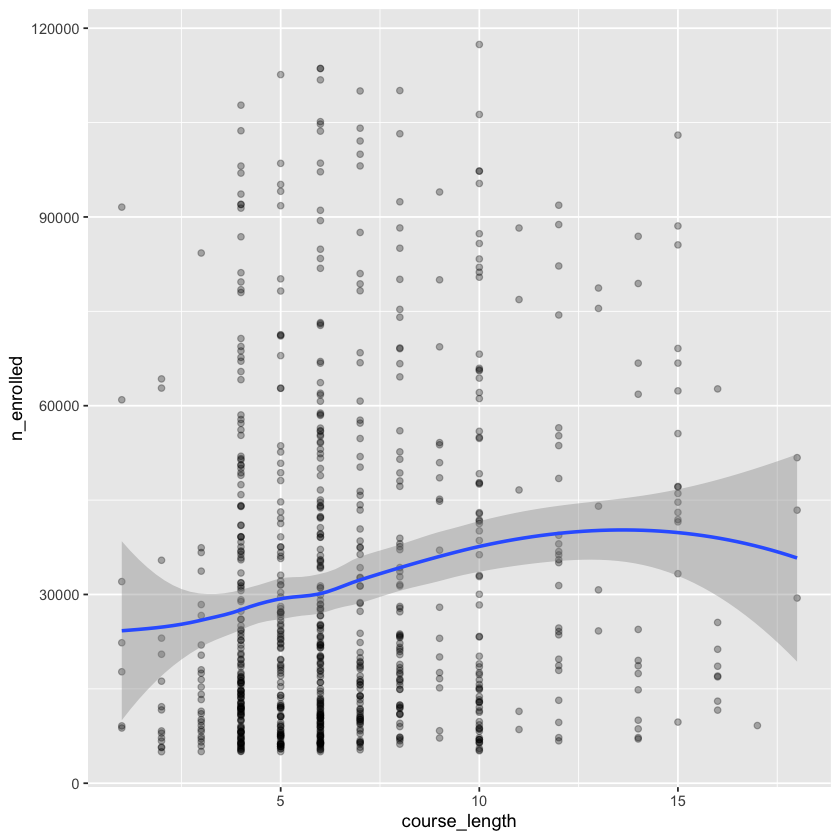

In [140]:
## Hypothesis (Ha) 1: There is a negative association between course length and the number of people enrolled. 
## Time is a limited resource, so learners in EdX MOOCs will be more likely to enroll in a course that demands
# less time.

## Null Hypothesis (Ho) 1: There is no association between course length and the number of people enrolled.


#Let's now visualize the relationship between n_enrolled and course length to take a first
# pass at examining our hypothesized relationship between the variables.
ggplot(data = edx_courses, aes(x = course_length, y = n_enrolled)) +
  geom_point(alpha=0.3) +
  geom_smooth()

##At first glance, there does not appear to be a positive relationship these two variables.
## The number of students enrolled in a course appears highest when the course length is between 10-15 weeks.

#Let's examine how well course length actually predicts n_enrolled.
glm.fit_length <- lm(n_enrolled~course_length, data = edx_courses)
summary(glm.fit_length)

#There is a statistically significant relationship between course length and n_enrolled, as seen with p value > 0.05.
# We can reject the Ho1 and conclude that there is a relationship between these two variables.
# There appears to be a positive, linear relationship between course_length and n_enrolled until course length
# rises to 15 weeks, at which point the relationship becomes negative.
# Further, about 2% of the variance of n_enrolled is explained by course length.


[1] 0 0 0 0 0 1


Call:
lm(formula = n_enrolled ~ top_uni, data = edx_courses)

Residuals:
   Min     1Q Median     3Q    Max 
-38812 -19210  -8737  13077  84787 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)    28805       1018   28.31  < 2e-16 ***
top_uni        15042       2346    6.41  2.5e-10 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 25720 on 785 degrees of freedom
  (120 observations deleted due to missingness)
Multiple R-squared:  0.04974,	Adjusted R-squared:  0.04853 
F-statistic: 41.09 on 1 and 785 DF,  p-value: 2.503e-10


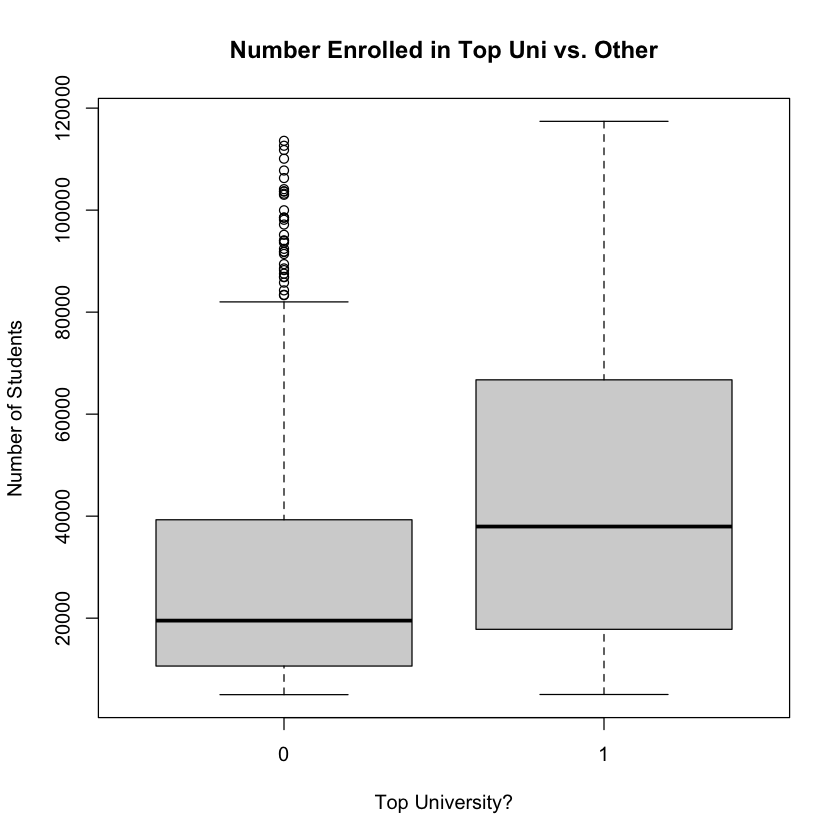

In [141]:
# Hypothesis 2: Students are more likely to enroll in courses offered by the top 10 universities in the world,
# as ranked by U.S. New & World Report, than they are in courses offered by other institutions. The reputation of 
# these top 10 schools could lead students to place more value on their courses.
# Null Hypothesis (Ho) 2: There is no relationship between whether a given university is in the top 10 and whether
# a student enrolls in a course offered by that institution.

#Visualize the data
boxplot(n_enrolled~top_uni,data=edx_courses, main="Number Enrolled in Top Uni vs. Other",
   xlab="Top University?", ylab="Number of Students")

#Let's examine how well top uni actually predicts n_enrolled.
glm.fit_length <- lm(n_enrolled~top_uni, data = edx_courses)
summary(glm.fit_length)

#Similarly, with p value < .05 I can reject the Ho2 and conclude that a course offered by a 
# university ranked in the Top 10 (as ranked by U.S. News & World Report) is significantly likely to attract more
# students than a university without this ranking. Top_uni also appears to be a more powerful predictor of 
# n_enrolled than does course_length, as top_uni explains about 4% of the variance of n_enrolled.



`geom_smooth()` using method = 'loess' and formula 'y ~ x'

Warning message:
“Removed 120 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 120 rows containing missing values (geom_point).”



Call:
lm(formula = n_enrolled ~ course_effort, data = edx_courses)

Residuals:
   Min     1Q Median     3Q    Max 
-27205 -20567  -9958  13163  85170 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)    32455.2     1773.0  18.306   <2e-16 ***
course_effort   -215.6      394.7  -0.546    0.585    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 26380 on 785 degrees of freedom
  (120 observations deleted due to missingness)
Multiple R-squared:  0.0003801,	Adjusted R-squared:  -0.0008933 
F-statistic: 0.2985 on 1 and 785 DF,  p-value: 0.585


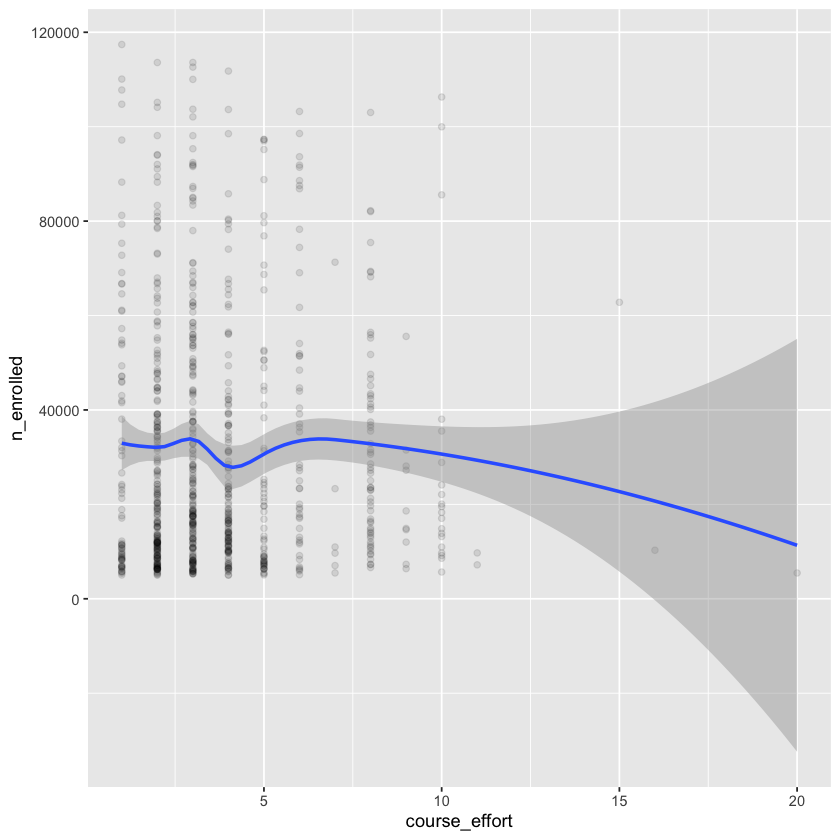

In [142]:
## Hypothesis (Ha) 3: There is a negative association between course effort and the number of people enrolled.
## Time is a limited resource, so learners in EdX MOOCs will likely prefer courses that demand fewer 
## hours per week of labor.

## Null Hypothesis (Ho) 3: There is no association between course effort (as measured in hours of labor per week)
# and the number of people enrolled.

#Let's visualize the relationship between n_enrolled and course effort to take a first
# pass at examining our hypothesized relationship between the variables.
ggplot(data = edx_courses, aes(x = course_effort, y = n_enrolled)) +
  geom_point(alpha=0.1) +
  geom_smooth()

#At first glance, there does not appear to be a negative association between course effort and number of people
# enrolled. However, the vast majority of courses appear to require 1-10 hours of effort per week. It is unclear
# why most courses fall within this range; it is possible that this design decision was informed by user research
# regarding amount of time available to spend on online courses conducted by the course providers.

#Let's examine how well course effort actually predicts n_enrolled.
glm.fit_effort <- lm(n_enrolled~course_effort, data = edx_courses)
summary(glm.fit_effort)

# Per p-value .58 > .05, there is no significant relationship between course effort and the number of people
# enrolled in a course. We fail to reject Ho 3. 
# Further, only .08% of the variance of n_enrolled can be explained by course effort.


NULL


Call:
lm(formula = n_enrolled ~ cs_course, data = edx_courses)

Residuals:
   Min     1Q Median     3Q    Max 
-32255 -19484 -10015  14119  87467 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)    29943       1065  28.105  < 2e-16 ***
cs_course       7313       2216   3.301  0.00101 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 26210 on 785 degrees of freedom
  (120 observations deleted due to missingness)
Multiple R-squared:  0.01369,	Adjusted R-squared:  0.01243 
F-statistic:  10.9 on 1 and 785 DF,  p-value: 0.001007


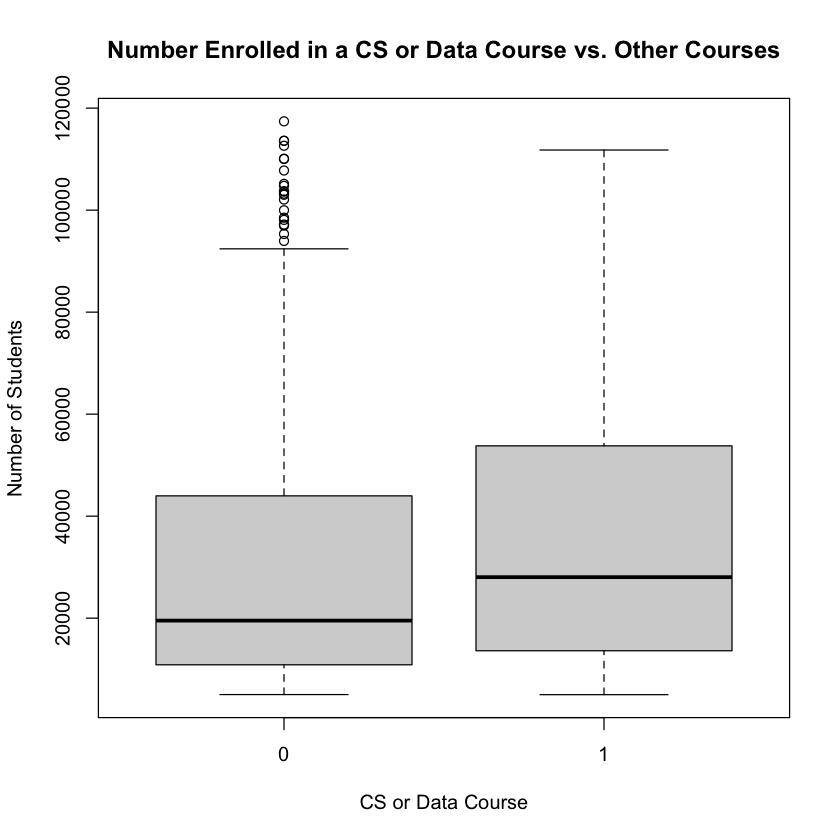

In [143]:
## Hypothesis (Ha) 4: There is a positive association between a course being related to computer science or 
## data analytics/science
## and the number of people enrolled in an online course. As computer science and data-related jobs 
## are growing rapidly,
## and people taking MOOCs have a demonstrated interest in spending time on a computer,
## it is reasonable to suspect that computer science and data analytics/science courses appeal to MOOC students.

## Null Hypothesis (Ho) 4: There is no association between wether a course is related to computer science or data analytics/science
## and the number of people enrolled in an online course.


head(edx_courses$cs_courses)

#Visualize the data
boxplot(n_enrolled~cs_course,data=edx_courses, main="Number Enrolled in a CS or Data Course vs. Other Courses",
   xlab="CS or Data Course", ylab="Number of Students")

#Let's examine how well cs_course actually predicts n_enrolled.
glm.fit_length <- lm(n_enrolled~cs_course, data = edx_courses)
summary(glm.fit_length)

##With p-value > .05, we can reject Ho4. A course related to computer science or data analysis/science 
## is significantly
# likely to have more students than a course of a different subject matter.




A final hypothesis is made and tested below based on the results of the above 4 analyses.


The downloaded binary packages are in
	/var/folders/y9/6115vtcn20d2bkkn_2tztqfh0000gn/T//Rtmp4RFqwu/downloaded_packages


Subset selection object
Call: regsubsets.formula(n_enrolled ~ top_uni + course_effort + course_length + 
    cs_course, data = edx_courses, nvmax = 4, method = "forward")
4 Variables  (and intercept)
              Forced in Forced out
top_uni           FALSE      FALSE
course_effort     FALSE      FALSE
course_length     FALSE      FALSE
cs_course         FALSE      FALSE
1 subsets of each size up to 4
Selection Algorithm: forward
         top_uni course_effort course_length cs_course
1  ( 1 ) "*"     " "           " "           " "      
2  ( 1 ) "*"     " "           " "           "*"      
3  ( 1 ) "*"     " "           "*"           "*"      
4  ( 1 ) "*"     "*"           "*"           "*"      

$names
[1] "which"  "rsq"    "rss"    "adjr2"  "cp"     "bic"    "outmat" "obj"   

$class
[1] "summary.regsubsets"

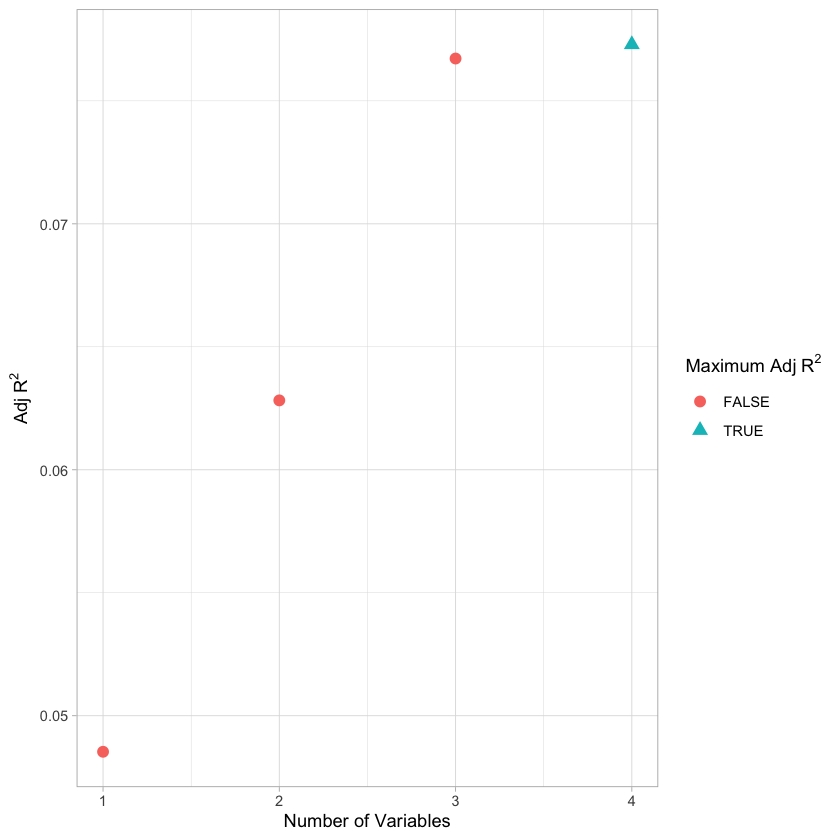

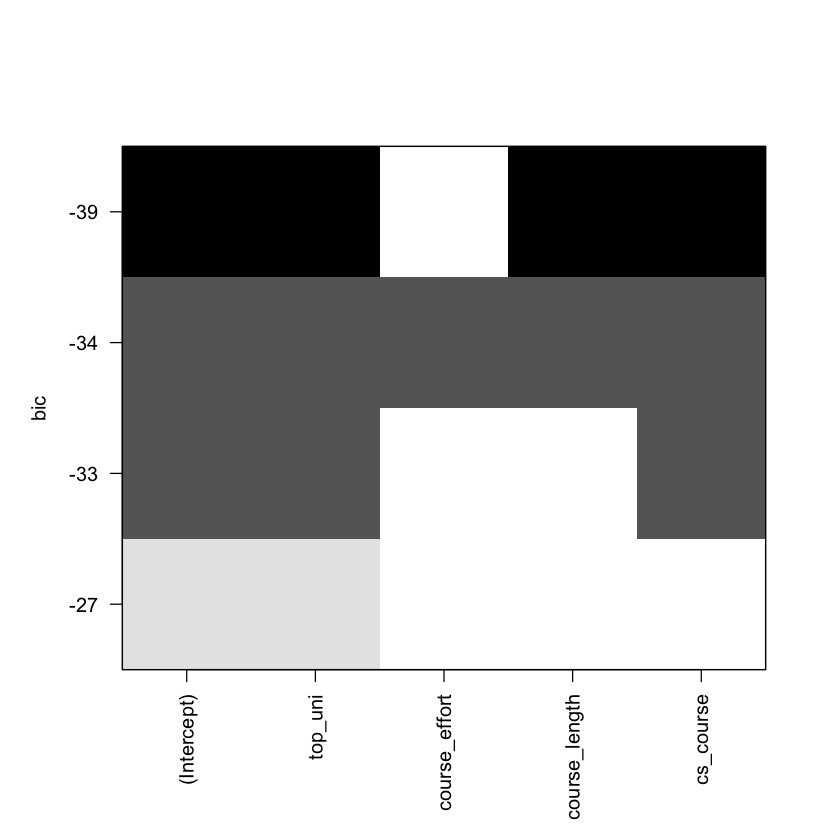

[1] 3

[1] 4

[1] 3

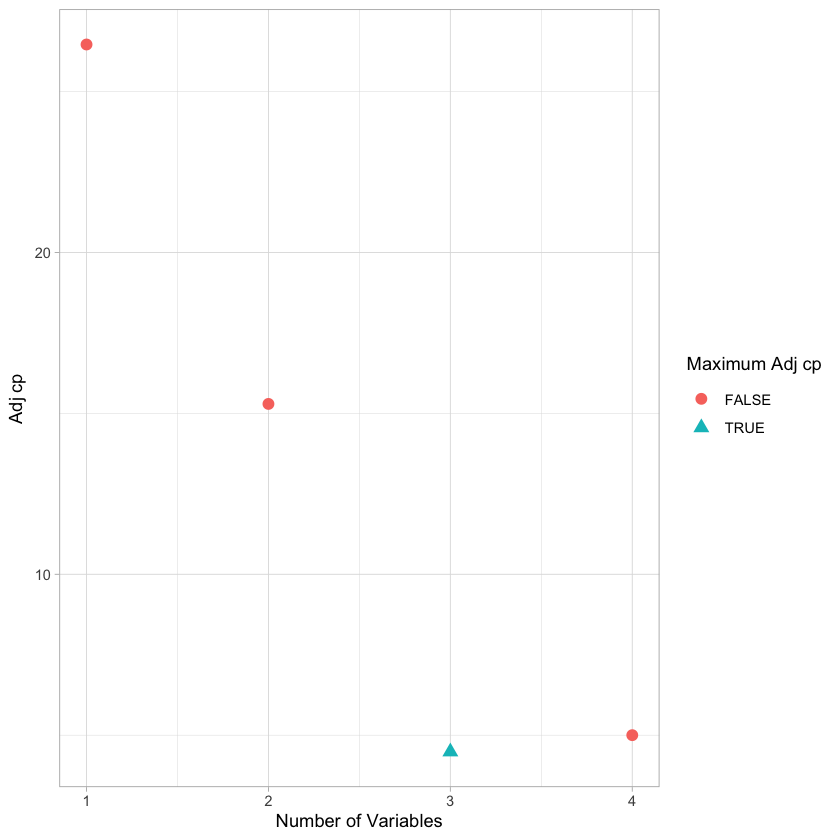

In [144]:
##Hypothesis 5 (Ha): A mixed effects model including the three predictor variables course_length, top_uni, and 
# cs_course will predict more of the variance in n_enrolled that will a four predictor model that also 
# includes course_effort as a predictor. 
# As an above analysis suggests that there is no significant relationship between n_enrolled and
# course effort, adding course_effort as a predictor in the model will add noise and reduce the model's accuracy.

# Ho 5: There is no difference in the prediction accuracies of a 3 predictor model including course_length, top_uni, 
# cs_course as predictors and that of a 4 predictor model that includes these variables and course_effort.


#Use forward step-wise model selection to identify the best-fit model with up to 4 predictor variables.
install.packages("leaps")
library(leaps)

edx_courses <- na.omit(edx_courses)

regfit_fwd <- regsubsets(n_enrolled~top_uni + course_effort + course_length + cs_course, data = edx_courses, nvmax = 4, method = "forward")
summary(regfit_fwd)


#Now compare AIC, BIC, CP of each model.

regfit_fwd_summary <- summary(regfit_fwd)

numvar = 1:length(regfit_fwd_summary$rss) # Make a vector that lists the number of variables in sequence, from 1 to 4. 
allfalse = rep(FALSE,length(regfit_fwd_summary$rss))

attributes(regfit_fwd_summary)

#Plot & Compare R2
adjr2.df <- data.frame(numvar = numvar, adjr2 <- regfit_fwd_summary$adjr2, maxadjr2 <- allfalse)
adjr2.df$maxadjr2[which.max(regfit_fwd_summary$adjr2)] <- TRUE
ggplot(adjr2.df,aes(x=numvar,y=adjr2,shape=maxadjr2,col=maxadjr2)) + 
  geom_point(size=3) + theme_light() + 
  labs(x = "Number of Variables", y = 'Adj'~R^2, color='Maximum Adj'~R^2, shape='Maximum Adj'~R^2)

#Plot & Compare BIC
plot(regfit_fwd, scale="bic")

#Plot & Compare Mallow's CP
#CP
numvar = 1:length(regfit_fwd_summary$rss) # Make a vector that lists the number of variables in sequence, from 1 to 19. 
allfalse = rep(FALSE,length(regfit_fwd_summary$rss))

cp.df <- data.frame(numvar = numvar, cp <- regfit_fwd_summary$cp, maxcp <- allfalse)
cp.df$maxcp[which.min(regfit_fwd_summary$cp)] <- TRUE
ggplot(cp.df,aes(x=numvar,y=cp,shape=maxcp,col=maxcp)) + 
  geom_point(size=3) + theme_light() + 
  labs(x = "Number of Variables", y = 'Adj'~cp, color='Maximum Adj'~cp, shape='Maximum Adj'~cp)

#Coefficients of best model in forward stepwise selection:
which.min(regfit_fwd_summary$bic) #BIC is best w 3
which.max(regfit_fwd_summary$adjr2) #R2 is best w 4
which.min(regfit_fwd_summary$cp) #CP is best w 3



The downloaded binary packages are in
	/var/folders/y9/6115vtcn20d2bkkn_2tztqfh0000gn/T//Rtmp4RFqwu/downloaded_packages


Subset selection object
Call: regsubsets.formula(n_enrolled ~ top_uni + course_effort + course_length + 
    cs_course, data = edx_courses, nvmax = 4, method = "backward")
4 Variables  (and intercept)
              Forced in Forced out
top_uni           FALSE      FALSE
course_effort     FALSE      FALSE
course_length     FALSE      FALSE
cs_course         FALSE      FALSE
1 subsets of each size up to 4
Selection Algorithm: backward
         top_uni course_effort course_length cs_course
1  ( 1 ) "*"     " "           " "           " "      
2  ( 1 ) "*"     " "           " "           "*"      
3  ( 1 ) "*"     " "           "*"           "*"      
4  ( 1 ) "*"     "*"           "*"           "*"      

$names
[1] "which"  "rsq"    "rss"    "adjr2"  "cp"     "bic"    "outmat" "obj"   

$class
[1] "summary.regsubsets"

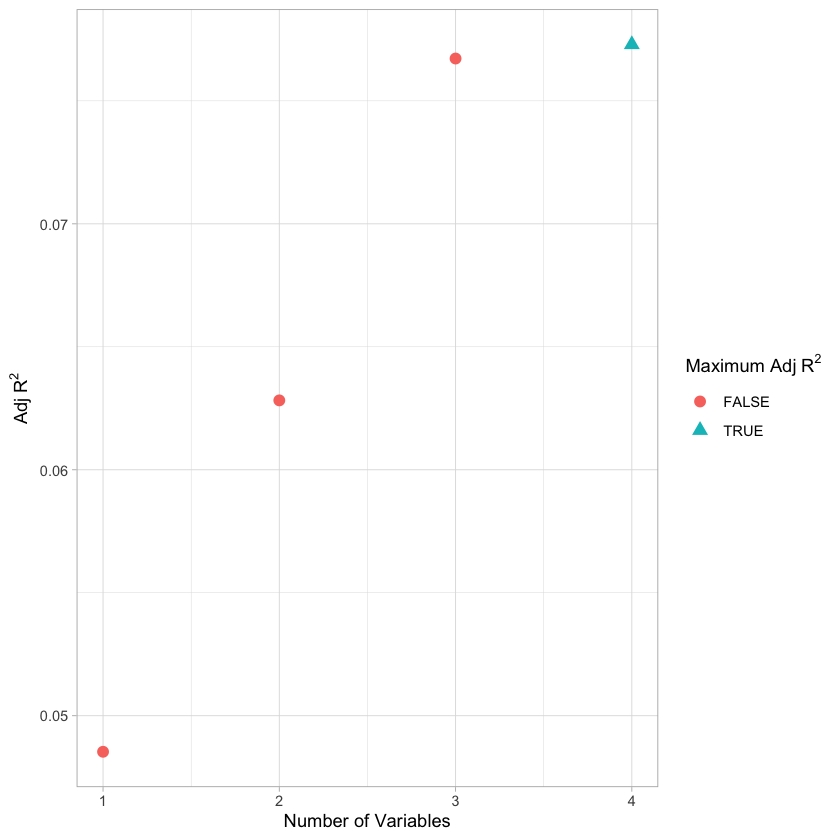

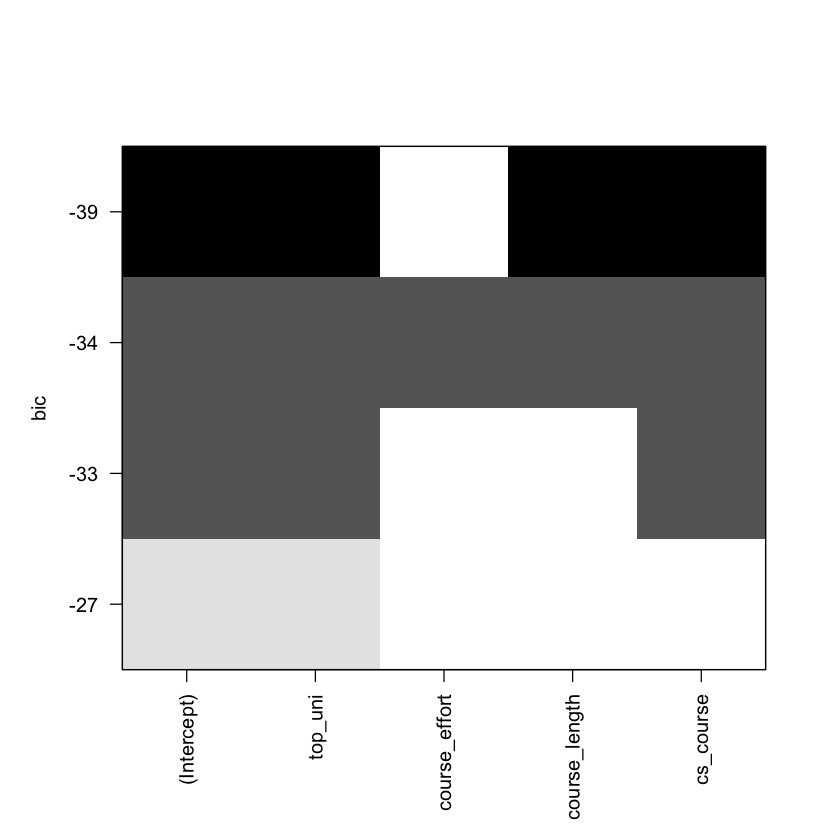

[1] 3

[1] 4

[1] 3

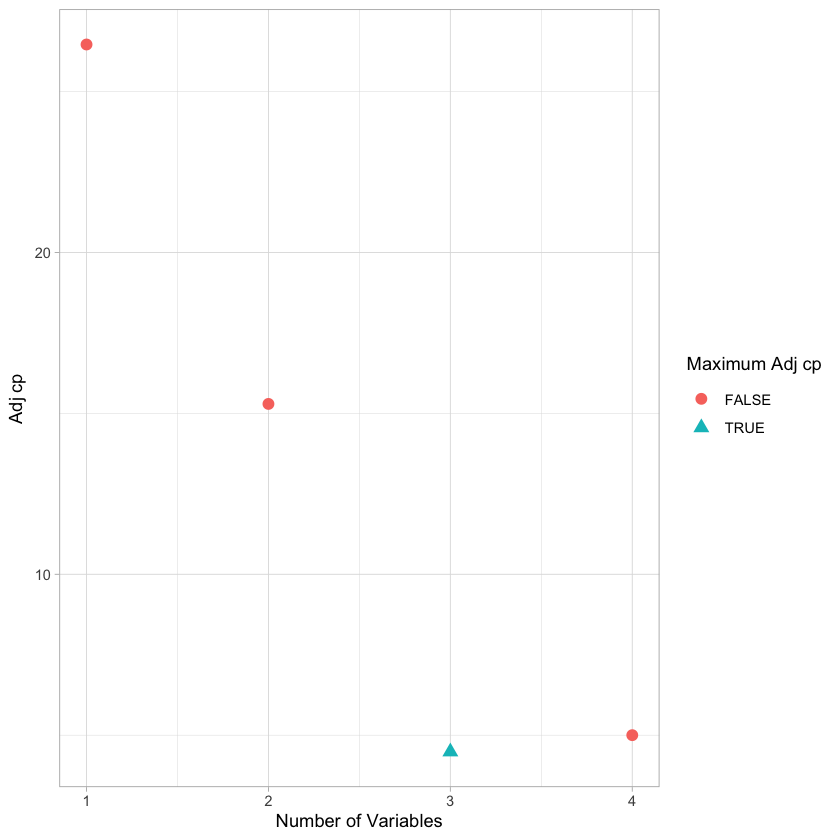

In [146]:
#Use backward step-wise model selection to identify the best-fit model with up to 4 predictor variables.
install.packages("leaps")
library(leaps)

edx_courses <- na.omit(edx_courses)

regfit_bwd <- regsubsets(n_enrolled~top_uni + course_effort + course_length + cs_course, data = edx_courses, nvmax = 4, method = "backward")
summary(regfit_fwd)


#Now compare R2, BIC, CP of each model.

regfit_bwd_summary <- summary(regfit_bwd)

numvar = 1:length(regfit_bwd_summary$rss) # Make a vector that lists the number of variables in sequence, from 1 to 4. 
allfalse = rep(FALSE,length(regfit_bwd_summary$rss))

attributes(regfit_fwd_summary)

#Plot & Compare R2
adjr2.df <- data.frame(numvar = numvar, adjr2 <- regfit_bwd_summary$adjr2, maxadjr2 <- allfalse)
adjr2.df$maxadjr2[which.max(regfit_bwd_summary$adjr2)] <- TRUE
ggplot(adjr2.df,aes(x=numvar,y=adjr2,shape=maxadjr2,col=maxadjr2)) + 
  geom_point(size=3) + theme_light() + 
  labs(x = "Number of Variables", y = 'Adj'~R^2, color='Maximum Adj'~R^2, shape='Maximum Adj'~R^2)

#Plot & Compare BIC
plot(regfit_bwd, scale="bic")

#Plot & Compare Mallow's CP
#CP
numvar = 1:length(regfit_bwd_summary$rss) # Make a vector that lists the number of variables in sequence, from 1 to 19. 
allfalse = rep(FALSE,length(regfit_bwd_summary$rss))

cp.df <- data.frame(numvar = numvar, cp <- regfit_bwd_summary$cp, maxcp <- allfalse)
cp.df$maxcp[which.min(regfit_bwd_summary$cp)] <- TRUE
ggplot(cp.df,aes(x=numvar,y=cp,shape=maxcp,col=maxcp)) + 
  geom_point(size=3) + theme_light() + 
  labs(x = "Number of Variables", y = 'Adj'~cp, color='Maximum Adj'~cp, shape='Maximum Adj'~cp)

#Coefficients of best model in forward stepwise selection:
which.min(regfit_bwd_summary$bic) #BIC is best w 3
which.max(regfit_bwd_summary$adjr2) #R2 is best w 4
which.min(regfit_bwd_summary$cp) #CP is best w 3

The results of both forward and backward stepwise model selection highlight that per BIC and Mallow's CP, the 3-predictor model has the best prediction accuracy. However, the adjusted R^2 suggests that the 4-predictor model has superior prediction accuracy. To further investigate which model has superior prediction accuracy, I will run 10-fold cross-validation below on the 1, 2, 3, and 4-predictor models, extract the MSE of each, and visualize the MSEs.

(Intercept)       top_uni course_length     cs_course 
    19890.810     13474.872      1083.845      8391.028


The downloaded binary packages are in
	/var/folders/y9/6115vtcn20d2bkkn_2tztqfh0000gn/T//Rtmp4RFqwu/downloaded_packages
[1] 645098141


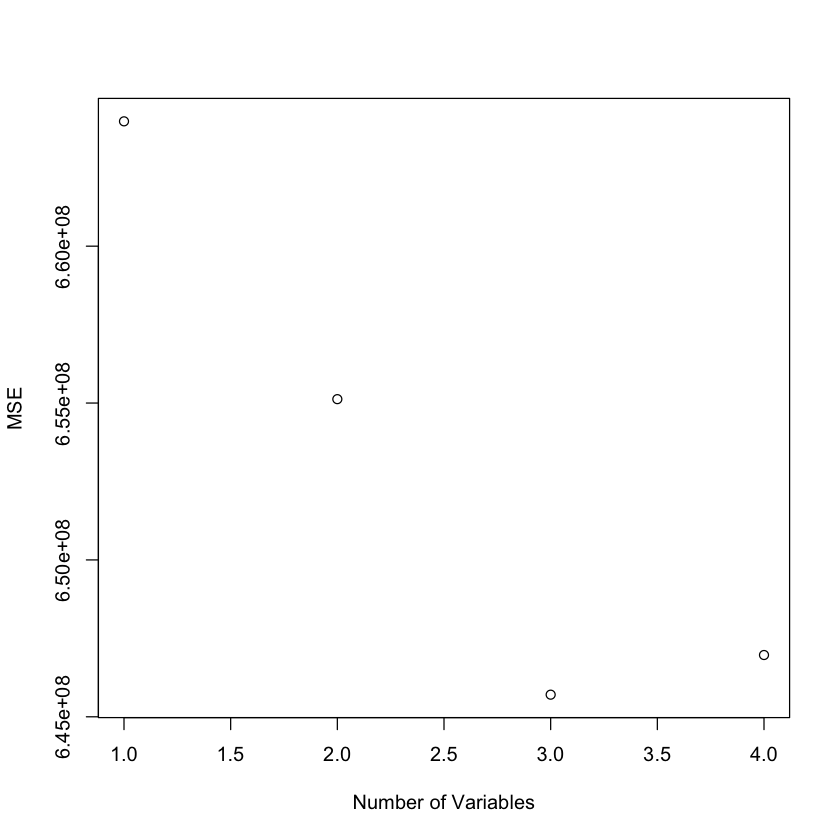

In [149]:
#Run cross-validation on each of the 4 models above.

glm.fit_mme = glm(n_enrolled~top_uni + course_length + cs_course, data=edx_courses)
coef(glm.fit_mme)

glm.fit_1 = glm(n_enrolled~top_uni, data=edx_courses)

glm.fit_2 = glm(n_enrolled~top_uni + cs_course, data=edx_courses)

glm.fit_3 = glm(n_enrolled~top_uni + cs_course + course_length, data=edx_courses)

glm.fit_4 = glm(n_enrolled~top_uni + cs_course + course_length + course_effort, data=edx_courses)



install.packages("boot")
library(boot)

cv.error.4 = rep(0,4)

cv.error.4[1] = cv.glm(edx_courses, glm.fit_1,K=10)$delta[1]
cv.error.4[2] = cv.glm(edx_courses, glm.fit_2,K=10)$delta[1]
cv.error.4[3] = cv.glm(edx_courses, glm.fit_3,K=10)$delta[1]
cv.error.4[4] = cv.glm(edx_courses, glm.fit_4,K=10)$delta[1]

plot(c(1,2,3,4),cv.error.4, xlab="Number of Variables", ylab="MSE")

print(cv.glm(edx_courses, glm.fit_3,K=10)$delta[1])


The above analyses demonstrate that per the BIC and Mallow's CP scores, the 3-predictor-variable has greater prediction accuracy than does the 4-predictor-variable model that includes course_effort. However, the adjusted R^2 score of the 4-predictor-variable model is higher, creating some uncertainty.

To further investigate which model has superior prediction accuracy, I ran a 10-fold cross-validation and extracted the MSE of each model. Plotted above, we can see that the MSE of the 3-predictor model is lower than that of the 4-predictor model.  

Given that the 3-predictor model has greater prediction accuracy in 3/4 measures, we can reject Ho5 and conclude that the 3-predictor model has greater prediction accuracy than does the 4-predictor model that includes course_effort.  It is possible that course_effort's lack of a relationship with n_enrolled creates noise in the model that reduces prediction accuracy.

**Conclusions:**

Based on the above analyses, the below variables appear to be significantly related to n_enrolled, and are thus useful in predicting the number of people that will enroll in an EdX course:

+ Course Length
+ Whether the course is offered by a Top 10 university.
+ Whether a course is related to computer science and/or data.

These results create a foundation on which to conduct future user research to determine why these course traits signifiacntly impact the number of people enrolled. User interviews, contextual inquiry, or surveys should be conducted in follow-up research to determine how each of these traits impacts the decision-making processes of EdX users.

Further, a crucial dimension missing from this analysis are the differences in the motives and interests of EdX users. Further research should explore the traits of EdX courses that most appeal to each particular demographic of EdX users, such as "career changers" and those who are taking a course for personal interest.